# NumPyの基本

[公式ドキュメントのチュートリアル](https://numpy.org/doc/stable/user/quickstart.html)

[僕がよくお世話になってるwiki](https://note.nkmk.me/numpy/)

## NumPyとは何か

[公式ドキュメント](https://numpy.org/doc/stable/user/whatisnumpy.html)より抜粋

NumPyは、Pythonによる科学計算のための基本パッケージです。多次元配列オブジェクト、様々な派生オブジェクト（マスクされた配列や行列など）、そして、数学、論理、図形操作、ソート、選択、入出力、離散フーリエ変換、基本的な線形代数、基本的な統計操作、ランダムシミュレーションなど、配列に対する高速な操作を行うルーチンの数々を提供するPythonライブラリです。

NumPyパッケージの核となるのが、ndarrayオブジェクトです。これは同種のデータ型のn次元配列をカプセル化したもので、多くの操作はパフォーマンスのためにコンパイルされたコードで実行されます。NumPyの配列と標準的なPythonの配列には、いくつかの重要な違いがあります。



*   NumPyの配列は、Pythonのリスト（動的に成長することができます）とは異なり、作成時に固定されたサイズを持っています。ndarrayのサイズを変更すると、新しい配列が作成され、元の配列は削除されます。
*   NumPyの配列の要素はすべて同じデータ型であることが要求され、したがって、メモリ上で同じサイズになります。例外として、（NumPyを含むPython）オブジェクトの配列を持つことができ、それによって異なるサイズの要素の配列が可能になります。
*   NumPyの配列は、大量のデータに対する高度な数学的操作や他の種類の操作を容易にします。一般的に、このような操作は、Pythonの組み込み配列を使用するよりも効率的で、より少ないコードで実行されます。

科学的、数学的なPythonベースのパッケージの多くがNumPyの配列を使用しています。これらは通常Pythonの配列入力をサポートしますが、処理の前に入力をNumPy配列に変換し、NumPy配列を出力することが多くなっています。言い換えれば、今日の科学的・数学的なPythonベースのソフトウェアの多く（おそらくほとんど）を効率的に使用するためには、Pythonの組み込みの配列型の使い方を知っているだけでは不十分で、NumPy配列の使い方も知っておく必要があるのです。



In [1]:
# 例えば、配列aと配列bの要素を足す操作をPythonのリストでやろうとしたら…
a = [1, 2, 3, 4, 5]
b = [6, 7, 8, 9, 10]

print(a + b) # これだとダメ

c = []
for i in range(len(a)):
  if len(a)==len(b):
    c.append(a[i]+b[i])

print(c) # こうする必要がある…めんどくさいし、遅い

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[7, 9, 11, 13, 15]


## インポート

In [2]:
import numpy as np # numpyというライブラリをnpという名前でimport
print(np.__version__) # numpyのバージョン確認

1.21.5


## 1次元 numpy array

### numpy array の生成

リストや配列などをnp.array()で囲むことでnp.arrayに変換できる

以下の`arr_1 ~ arr_4`は全て同じarrayができるはず

In [3]:
arr_1 = np.array([1, 2, 3, 4, 5])
print(arr_1)
arr_2 = np.array(range(1,6))
print(arr_2)
arr_3 = np.array([i for i in range(1, 6)])
print(arr_3)
arr_4 = np.arange(1,6)
print(arr_4)

[1 2 3 4 5]
[1 2 3 4 5]
[1 2 3 4 5]
[1 2 3 4 5]


### 要素同士の演算

「配列の要素同士の演算」は、numpy arrayならば(コーディングも実行も)一瞬

In [4]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([6, 7, 8, 9, 10])

c = a + b
print(c)

[ 7  9 11 13 15]


長さの異なる配列で要素同士の演算を行うと、エラーを吐いてくれる

In [5]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([6, 7, 8, 9, 10, 11])

print(a+b)

'''
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-15-c9501e7f064c> in <module>()
      3 b = np.array([6, 7, 8, 9, 10, 11])
      4 
----> 5 print(a+b)

ValueError: operands could not be broadcast together with shapes (5,) (6,) 
'''

ValueError: ignored

配列に対して定数Cを足すと、各要素が+Cされる

In [6]:
a = np.array([0, 1, 2, 3, 4])
b = a + 10

print(b)

[10 11 12 13 14]


配列に対して定数Cを掛けると、各要素が×Cされる

In [7]:
a = np.array([0, 1, 2, 3, 4])
b = 3 * a

print(b)

[ 0  3  6  9 12]


### numpy array のスライシング

In [12]:
a = np.array([0, 1, 2, 3, 4])

print(a[0])
print(a[:2])
print(a[-1])
print(a[2:])

0
[0 1]
4
[2 3 4]


### fancy indexing

numpy array は、bool値が入ったarrayをスライスにわたすと、Trueの入ったインデックスのみを返してくれる機能がある。これを「Fancy Indexing」という

In [13]:
judge = np.array([True, False, False, True, False, True, True])
a = np.arange(len(judge))
print(a)

b = a[judge] # aそのものが変化しているわけではない
print(b)

[0 1 2 3 4 5 6]
[0 3 5 6]


これが非常に便利な機能で、例えば配列の中から2の倍数のみを引っ張りたいときは以下のように書けばいい

In [15]:
a = np.arange(100)
print(a)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [16]:
print(a%2==0)

[ True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False  True False  True False  True False  True False
  True False  True False]


In [17]:
print(a[a%2==0])

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94
 96 98]


In [26]:
aa = 9
print((aa%2==0) | (aa%3==0)) # orという意味
print((aa%2==0) & (aa%3==0)) # &という意味

True
False


In [23]:
print(a[(a%2==0) | (a%3==0)])　 # or だとエラーになる

[ 0  2  3  4  6  8  9 10 12 14 15 16 18 20 21 22 24 26 27 28 30 32 33 34
 36 38 39 40 42 44 45 46 48 50 51 52 54 56 57 58 60 62 63 64 66 68 69 70
 72 74 75 76 78 80 81 82 84 86 87 88 90 92 93 94 96 98 99]


In [27]:
print(a[(a%2==0) & (a%3==0)]) # and だとエラーになる

[ 0  6 12 18 24 30 36 42 48 54 60 66 72 78 84 90 96]


### numpy array のデータ型とその変換

データ型：numpy arrayはそれぞれデータ型を有しており、`arr.dtype`で確認できる

In [28]:
from matplotlib.font_manager import list_fonts
a = np.arange(10)

print(a)
print(a.dtype) # 属性

# lst = [1, 2, 3]
# lst.append(4) # メソッド
# print(lst)

[0 1 2 3 4 5 6 7 8 9]
int64


In [33]:
np.random.rand?
# 関数やクラスに？をつけるとヘルプが表示される

In [34]:
b = np.random.rand(10)

print(b)
print(b.dtype)

[0.66078198 0.09203606 0.97739492 0.86186445 0.51338606 0.9206191
 0.1914514  0.1168466  0.24866221 0.69934425]
float64


In [35]:
np.full?

In [36]:
c = np.full(10, True)
c[:3] = False

print(c)
print(c.dtype)

[False False False  True  True  True  True  True  True  True]
bool


データ型の変換を行うには、`astype`を使う

In [37]:
a = np.arange(10)

print(a, a.dtype)

b = a.astype(float)

print(b, b.dtype)

[0 1 2 3 4 5 6 7 8 9] int64
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] float64


In [39]:
c = np.full(10, True)
c[:3] = False

print(c, c.dtype)

d = c.astype(int)

print(d, d.dtype)

[False False False  True  True  True  True  True  True  True] bool
[0 0 0 1 1 1 1 1 1 1] int64


In [44]:
a = np.arange(10)
print(a.shape)
print(len(a))

(10,)
10


## 多次元 numpy array

### 多次元配列の生成とshape, axis

ここからがnumpyの真骨頂。まずは2次元配列から

In [41]:
arr_2d = np.array([
  [1, 2, 3],
  [4, 5, 6],
  [7, 8, 9],
  [10, 11, 12]
])

numpy array の形(shape)を知りたいときは、`arr.shape`で知ることができる

In [42]:
print(arr_2d.shape) # shapeはタプル型

(4, 3)


`len`を使うと、一番外側(`axis=0`)の長さだけが表示れる

In [43]:
print(len(arr_2d))

4


In [45]:
arr_2d = np.array([
  [1, 2, 3],
  [4, 5, 6],
  [7, 8, 9],
  [10, 11, 12]
])

最初の`4`が0番目の軸(axis=0)、次の`3`が1番目の軸(axis=1)

In [46]:
print(arr_2d[0]) # これだと、axis=0の0番目が引き出される

[1 2 3]


In [47]:
print(arr_2d[2]) # これだと、axis=0の2番目が引き出される

[7 8 9]


In [48]:
print(arr_2d[0, 2])  # axis=0の0番目、axis=1の2番目が引き出される

3


In [49]:
print(arr_2d[:, 2]) # axis=1の2番目のarrが引き出される

[ 3  6  9 12]


練習問題: `[1, 4, 7, 10]`を表示せよ

In [50]:
print(arr_2d[:,0])

[ 1  4  7 10]


形の変形 : `arr.reshape(shape)`

In [51]:
a = np.arange(12)
print(a)
print('-'*50)

b = a.reshape(4, 3) # aを、4×3の配列になるように変形する
print(b)
print('-'*50)

c = a.reshape(2, 6) # aを、2×6の配列になるように変形する
print(c)
print('-'*50)

d = a.reshape(6, -1) # -1を入れると「うまいこと」やってくれる
print(d)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
--------------------------------------------------
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
--------------------------------------------------
[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]
--------------------------------------------------
[[ 0  1]
 [ 2  3]
 [ 4  5]
 [ 6  7]
 [ 8  9]
 [10 11]]


### 多次元配列でのfancy indexing

パターン1 : indexingに用いる配列の長さが、ndexingされる配列のaxis=0の長さと同じ場合

In [55]:
np.random.seed(0)
judge  = np.random.randint(0, 2, 5).astype(bool) # [0,1) の乱整数を5個作成し、bool値に変換して配列に詰めている
a = np.arange(10).reshape(5, 2)

print(judge)
print(a)
print(a.shape)

[False  True  True False  True]
[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
(5, 2)


この場合は、axis=0の方向でスライスされる

In [56]:
print(a[judge])

[[2 3]
 [4 5]
 [8 9]]


パターン2 : indexingに用いる配列とindexingされる配列のshapeが一致している場合

In [59]:
np.random.seed(0)
judge = np.random.randint(0, 2, 12).reshape(3, 4).astype(bool)
a = np.arange(12).reshape(3, 4)


print(judge, judge.shape)
print(a, a.shape)

[[False  True  True False]
 [ True  True  True  True]
 [ True  True  True False]] (3, 4)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]] (3, 4)


Trueのindexの要素が平坦になって(1次元化されて)返される

In [60]:
print(a[judge])

[ 1  2  4  5  6  7  8  9 10]


練習問題 2-10 : 配列`b`を配列`a`と同じ`shape`に`reshape`した後、`a+b`を計算せよ。

その計算結果を`c`に代入し、`c`の要素のうち3の倍数であるもののみを表示せよ(1次元配列で構わない)

In [ ]:
a = np.array([
  [1, 2, 3, 4],
  [5, 6, 7, 8]
])

b = np.arange(5, 13)

### 3次元以上の多次元配列

3次元以上でも2次元のときと同じノリで行ける

In [69]:
arr_4d = np.arange(100).reshape(2, 5, 2, 5)

print(arr_4d)
print(arr_4d.shape)
print(arr_4d.ndim) # arr.ndimで、numpy.arrayの次元を確認できる
print(len(arr_4d.shape)) # arr.ndimと同じ意味

[[[[ 0  1  2  3  4]
   [ 5  6  7  8  9]]

  [[10 11 12 13 14]
   [15 16 17 18 19]]

  [[20 21 22 23 24]
   [25 26 27 28 29]]

  [[30 31 32 33 34]
   [35 36 37 38 39]]

  [[40 41 42 43 44]
   [45 46 47 48 49]]]


 [[[50 51 52 53 54]
   [55 56 57 58 59]]

  [[60 61 62 63 64]
   [65 66 67 68 69]]

  [[70 71 72 73 74]
   [75 76 77 78 79]]

  [[80 81 82 83 84]
   [85 86 87 88 89]]

  [[90 91 92 93 94]
   [95 96 97 98 99]]]]
(2, 5, 2, 5)
4
4


## numpy array 同士の結合

### np.stack

新しいaxisを生成して結合する方法

In [ ]:
a = np.arange(10)
b = np.arange(10, 20)

print(a, a.shape)
print(b, b.shape)

In [ ]:
c = np.stack([a, b])
print(c, c.shape)

`np.stack`の第2引数として、どのaxisに新しいaxisを生成するかを指定することができる(デフォルトではaxis=0)

In [ ]:
c = np.stack([a, b], axis=-1)
print(c, c.shape)

3つ以上の配列でも可能

In [ ]:
d = np.arange(20, 30)
e = np.stack([a, b, d])

print(e, e.shape)

多次元配列同士のstackの例も示す

In [ ]:
a = np.arange(12).reshape(3, 4)
b = np.arange(12, 24).reshape(3, 4)

print(a, a.shape)
print(b, b.shape)

In [ ]:
c = np.stack([a, b])

print(c, c.shape)

In [ ]:
c = np.stack([a, b], axis=1)
print(c, c.shape)

In [ ]:
c = np.stack([a, b], axis=2)
print(c, c.shape)

### np.concatenate

既存のaxis方向に配列を結合する

In [ ]:
a = np.arange(10)
b = np.arange(10, 20)

print(a, a.shape)
print(b, b.shape)

In [ ]:
c = np.concatenate([a, b])
print(c, c.shape)

In [ ]:
a = np.arange(12).reshape(3, 4)
b = np.arange(12, 24).reshape(3, 4)

print(a, a.shape)
print(b, b.shape)

In [ ]:
c = np.concatenate([a, b]) # axisを指定しないとaxis=0方向に連結される
print(c, c.shape)

In [ ]:
c = np.concatenate([a, b], axis=-1)
print(c, c.shape)

## numpyの数学的関数

numpyには初等的数学関数のほとんどが実装されている

#### 指数・対数関数

In [79]:
x = np.linspace(0, 10, 101) # 0 から 100 までを101分割して配列にする
# print(x)
# print(x.shape)

# print(x)
# print(np.exp(x))

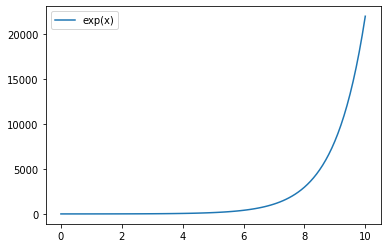

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


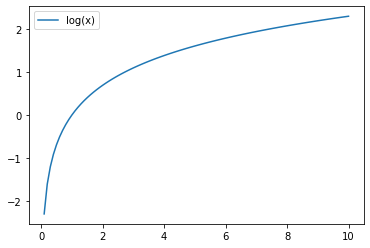

In [80]:
# matplotlib使います
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 101) # 0 から 100 までを101分割して配列にする

plt.plot(x, np.exp(x), label='exp(x)')
plt.legend()
plt.show()

plt.plot(x, np.log(x), label='log(x)')
plt.legend()
plt.show()

#### 三角関数

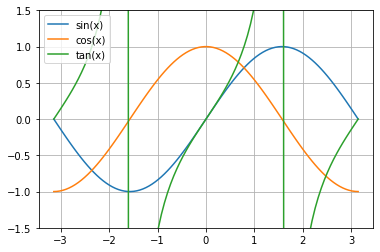

In [81]:
x = np.linspace(-np.pi, np.pi, 100) # -pi から pi までを100分割して配列にする

plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.plot(x, np.tan(x), label='tan(x)')
plt.ylim([-1.5, 1.5])
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [91]:
np.arctan(np.inf) == np.pi/2
# np.tan(np.pi/2) == np.inf

True

#### 逆三角関数

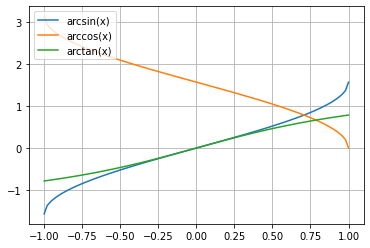

In [92]:
x = np.linspace(-1, 1, 101) # -1 から 1 までを101分割して配列にする

plt.plot(x, np.arcsin(x), label='arcsin(x)')
plt.plot(x, np.arccos(x), label='arccos(x)')
plt.plot(x, np.arctan(x), label='arctan(x)')
plt.legend(loc='upper left')
plt.grid()
plt.show()

配列の中から一部分を切り取ることを、「スライス」という

1次元 numpy array のスライスはリストと同じ感じ

In [93]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
print('a[0]\t', a[0])
print('a[1]\t', a[1])
print('a[-1]\t', a[-1])
print('a[:2]\t', a[:2])
print('a[3:]\t', a[3:])
print('a[2:5]\t', a[2:5])

a[0]	 1
a[1]	 2
a[-1]	 10
a[:2]	 [1 2]
a[3:]	 [ 4  5  6  7  8  9 10]
a[2:5]	 [3 4 5]


## numpy array による乱数の生成

#### 一様乱数

[0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293 ]


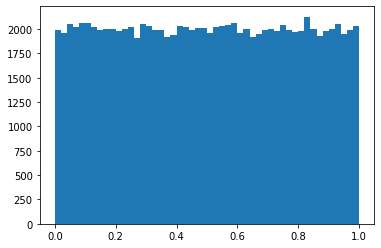

In [94]:
x = np.random.rand(100000,) # [0,1) の一様乱数を生成(引数でshapeを指定)
print(x[:10])

plt.hist(x, bins=50)
plt.show()

[4 6 0 8 2 0 5 0 8 1]


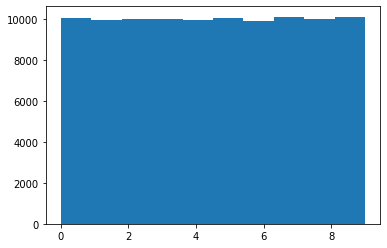

In [95]:
x = np.random.randint(0, 10, 100000) # [第一引数, 第二引数) の一様乱数整数を生成(第三引数はshape)
print(x[:10])

plt.hist(x)
plt.show()

#### 正規乱数

[-1.47672784 -0.1624938   1.79844804  2.12240518  0.84978675  0.18306083
 -0.54446833 -1.16813002 -1.7292301   0.55229231]


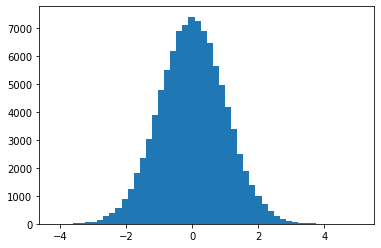

In [96]:
x = np.random.randn(100000,) # 標準正規分布(μ=0, σ=1)の正規乱数を生成(引数でshapeを指定)
print(x[:10])

plt.hist(x, bins=50)
plt.show()

[-4.6079297  -5.50030366 -4.86385721 -4.42166418 -4.74798722 -5.0234538
 -4.5324143  -5.06334198 -6.09783163 -4.86175039]
[ 0.00951679  5.86816934  6.56514915 -1.27877256  4.60263108 -1.02324686
  4.43297086  1.28568909 -1.00553909  3.71079674]


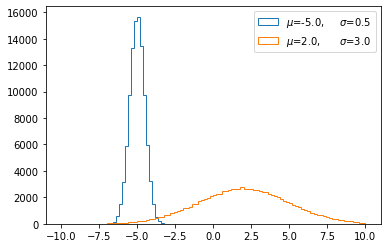

In [97]:
x = np.random.normal(-5, 0.5, 100000) # μ=(第一引数), σ=(第二引数) の正規乱数を生成(第三引数はshape)
y = np.random.normal(2, 3, 100000)

print(x[:10])
print(y[:10])

bins = np.linspace(-10, 10, 101)
plt.hist(x, bins=bins, histtype='step', label='$\mu$=-5.0,\t$\sigma$=0.5')
plt.hist(y, bins=bins, histtype='step', label='$\mu$=2.0,\t$\sigma$=3.0')
plt.legend()
plt.show()

他にも分布は多く用意されている。必要に応じて調べること

## numpy arrayの統計処理

#### 平均
`np.mean(arr)`, もしくは`arr.mean()`で平均を求めることができる

In [98]:
arr_1d = np.random.normal(2.0, 1.0, 10000)
print(np.mean(arr_1d))
print(arr_1d.mean())

1.9896332299198678
1.9896332299198678


多次元配列の場合は、meanの引数に`axis`を指定することでその方向のみに平均を取る

In [99]:
arr_3d = np.random.normal(2.0, 1.0, (1000, 2, 3))

print(np.mean(arr_3d, axis=0), (np.mean(arr_3d, axis=0)).shape)

[[1.98503316 1.99559004 2.07055534]
 [2.00962144 2.01349985 1.98487736]] (2, 3)


In [100]:
print(np.mean(arr_3d, axis=1), (np.mean(arr_3d, axis=1)).shape)

[[2.65150157 1.13975685 1.87513711]
 [1.55492299 2.31824638 1.95066792]
 [2.56936192 2.44443664 2.86656171]
 ...
 [1.97057926 1.60554759 2.49116225]
 [2.56610728 1.91126628 1.96761808]
 [2.92336336 0.48422467 0.7370401 ]] (1000, 3)


多次元配列で次元を保持したい場合は、`keepdims=True`とする

In [101]:
arr_3d = np.random.normal(2.0, 1.0, (1000, 2, 3))
print(np.mean(arr_3d, axis=0, keepdims=True), (np.mean(arr_3d, axis=0, keepdims=True)).shape)

[[[2.01341786 2.01607317 1.96227541]
  [2.03425057 1.98714433 1.98220744]]] (1, 2, 3)


In [102]:
np.mean?

#### 中央値
`np.median(arr)`で中央値を計算できる

In [103]:
arr_1d = np.random.normal(2.0, 1.0, 10000)
print(np.median(arr_1d))

2.001940363883657


#### 合計
`np.sum(arr)`で合計を求めることができる

In [104]:
arr_1d = np.random.normal(2.0, 1.0, 10000)
print(np.sum(arr_1d))
print(arr_1d.sum())

19941.522729719858
19941.522729719858


#### 分散・標準偏差
`np.var(arr)`で分散を、`np.std(arr)`を求めることができる

不偏分散を求めたいときは`ddof=1`とする

In [105]:
np.var?

In [106]:
arr_1d = np.random.normal(2.0, 5.0, 10000)
print(np.var(arr_1d, ddof=1))
print(np.std(arr_1d, ddof=1))

24.83600065806003
4.983573081440667


練習問題 2-20: 一次元配列の平均と標準誤差を返り値とする関数を作成せよ

In [107]:
def cal_mean_and_err(arr):
  return np.mean(arr), np.std(arr, ddof=1)/np.sqrt(len(arr))

In [109]:
cal_mean_and_err(arr_1d)

(1.9624745706017137, 0.049835730814406676)

#### 最大値・最小値
`np.min()`, `np.max()`でそれぞれ最大値・最小値が得られる

In [ ]:
arr_1d = np.random.randint(0, 10, 1000)
print(np.min(arr_1d))
print(np.max(arr_1d))

## numpy array の sort

In [ ]:
arr_1d = np.random.randint(0, 10, 10)
print('arr_1d')
print(arr_1d)
print('np.sort(arr_1d)')
print(np.sort(arr_1d)) # ソートされたarr_1dを表示している(もとのarr_1dは並び替えられてない)
print('np.sort(arr_1d)[::-1]')
print(np.sort(arr_1d)[::-1]) # 降順にsortしたい場合はarrayを逆順にする操作[::-1]を用いる
print('arr_1d')
print(arr_1d)
arr_1d.sort() # arr_1d自体をソートしている(破壊的な処理、非推奨)
print('arr_1d (arr_1d.sort()後)')
print(arr_1d)

In [ ]:
arr_2d = np.random.randint(0, 10, (2, 10))
print('arr_2d')
print(arr_2d)
print('\nnp.sort(arr_2d, axis=0)')
print(np.sort(arr_2d, axis=0)) # 多次元配列の場合は、sortしたい軸方向を指定する
print('\nnp.sort(arr_2d, axis=1)')
print(np.sort(arr_2d, axis=1))

## [NumPyの練習問題](https://qiita.com/konitech913/items/68e58b1b95d18cadf09c)

In [110]:
from google.colab import drive
drive.mount('/content/drive')
! git clone https://github.com/rougier/numpy-100.git
! cp -r numpy-100 /content/drive/MyDrive/

import os
os.path.exists('/content/drive/MyDrive/numpy-100') # 最後にTrueと出ればGoogle Driveにコピーできている

Mounted at /content/drive
Cloning into 'numpy-100'...
remote: Enumerating objects: 888, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 888 (delta 65), reused 79 (delta 50), pack-reused 777
Receiving objects: 100% (888/888), 457.40 KiB | 14.29 MiB/s, done.
Resolving deltas: 100% (501/501), done.


True